# Libraries

In [1]:
import numpy as np 
import pandas as pd
import random
import matplotlib.pyplot as plt

random.seed(42)
np.random.seed(42)

%matplotlib widget

# PART 1: Random Walk visualizations in multiple dimensions

### Random Walk in 1D

In [2]:
n_steps = 1000
n_sims = 6
proba = 0.5
step_size = 1

simulation_data = pd.DataFrame()


def simulate_1d_rw(n_steps, p, step_size):
    steps = [1* step_size if random.random() < p else -1 * step_size for _ in range(n_steps)]
    y = np.cumsum(steps)
    x = list(range(len(y)))

    return x, list(y)

for i in range(1, n_sims):
    x, y = simulate_1d_rw(n_steps, proba, step_size)
    simulation_data['x'] = x
    simulation_data[f'y{i}'] = y


for i in range(1, n_sims):
    print(f'Final value of simulation {i} is {simulation_data[f'y{i}'].iloc[-1]}.')


Final value of simulation 1 is -40.
Final value of simulation 2 is -22.
Final value of simulation 3 is 4.
Final value of simulation 4 is -22.
Final value of simulation 5 is 24.


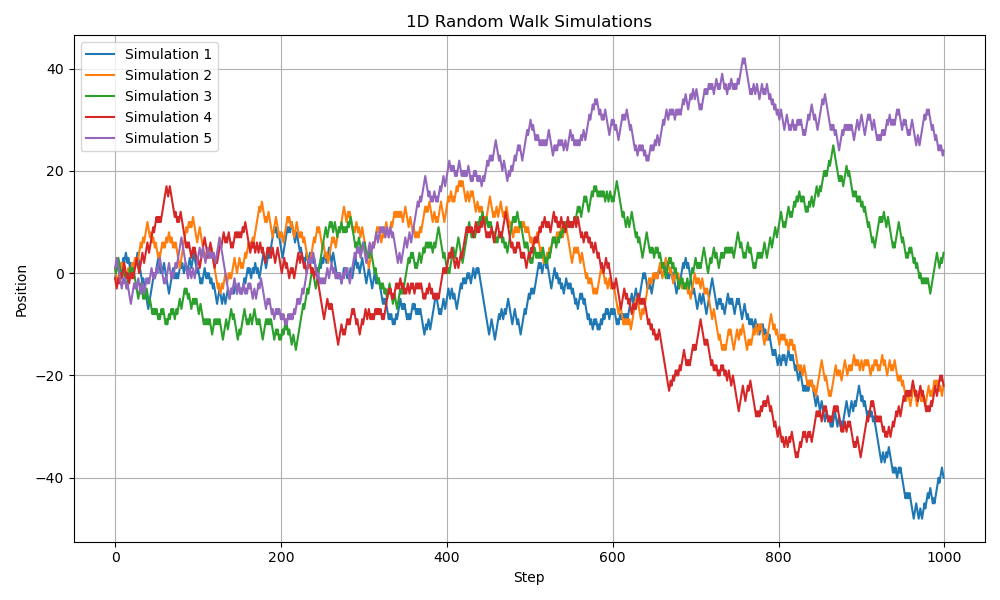

In [3]:
plt.figure(figsize  = (10,6))

for i in range(1, n_sims):
    plt.plot(simulation_data['x'], simulation_data[f'y{i}'], label = f'Simulation {i}')

plt.xlabel("Step")
plt.ylabel("Position")
plt.title("1D Random Walk Simulations")
plt.grid(True)
plt.tight_layout()
plt.legend()
plt.show()

### Random Walk in 2D

In [4]:
n_steps = 10000
#n_sims = 6
step_size = 1

def simulate_2d_rw(nsteps, stepsize=1):

    deltas = [ (0,-1*stepsize), (-1*stepsize,0), (0,1*stepsize), (1*stepsize,0) ]

    steps = [ list(random.choice(deltas)) for i in range(nsteps) ]
    steps = np.array(steps)
    steps = np.cumsum(steps,axis=0)
    y = list(steps[:,1])
    x = list(steps[:,0])

    return x, y

x, y = simulate_2d_rw(n_steps , step_size)

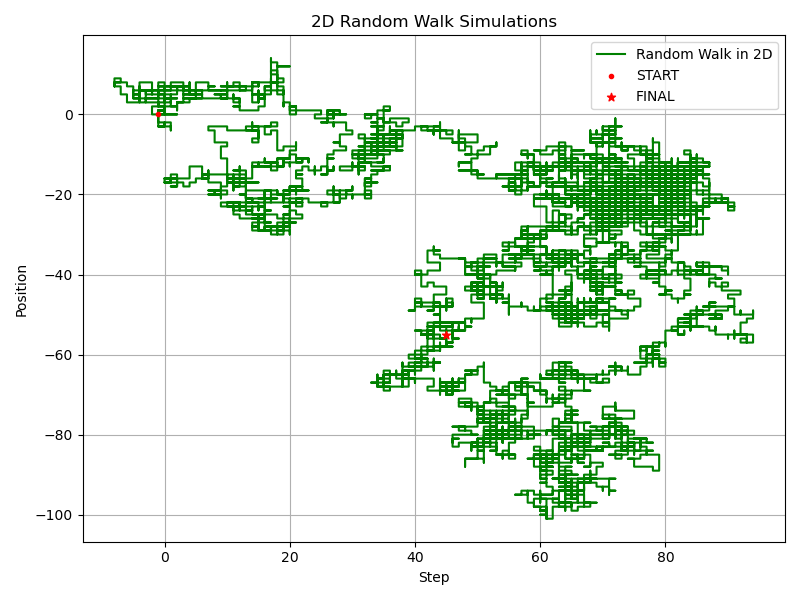

In [5]:
plt.figure(figsize = (8,6), dpi = 100)
plt.plot(x, y, color = 'green', label = 'Random Walk in 2D')

plt.scatter(x[0], y[0], color = 'red', marker = '.', label = 'START', zorder = 10)
plt.scatter(x[-1], y[-1], color = 'red', marker = '*', label = 'FINAL', zorder = 10)

plt.xlabel("Step")
plt.ylabel("Position")
plt.title("2D Random Walk Simulations")
plt.grid(True)
plt.tight_layout()
plt.legend()
plt.show()

### Random Walk in 3D

In [6]:
n_steps = 10000
#n_sims = 6
step_size = 1

def simulate_3d_rw(nsteps, stepsize=1):

    deltas = [ (0,-1*stepsize,0), (0,1*stepsize,0), (0,0,1*stepsize), (0,0, -1*stepsize),(-1*stepsize,0,0),(1*stepsize,0,0) ]

    steps = [ list(random.choice(deltas)) for i in range(nsteps) ]
    steps = np.array(steps)
    steps = np.cumsum(steps,axis=0)
    z = list(steps[:,2])
    y = list(steps[:,1])
    x = list(steps[:,0])

    return x, y, z

x, y, z = simulate_3d_rw(n_steps , step_size)

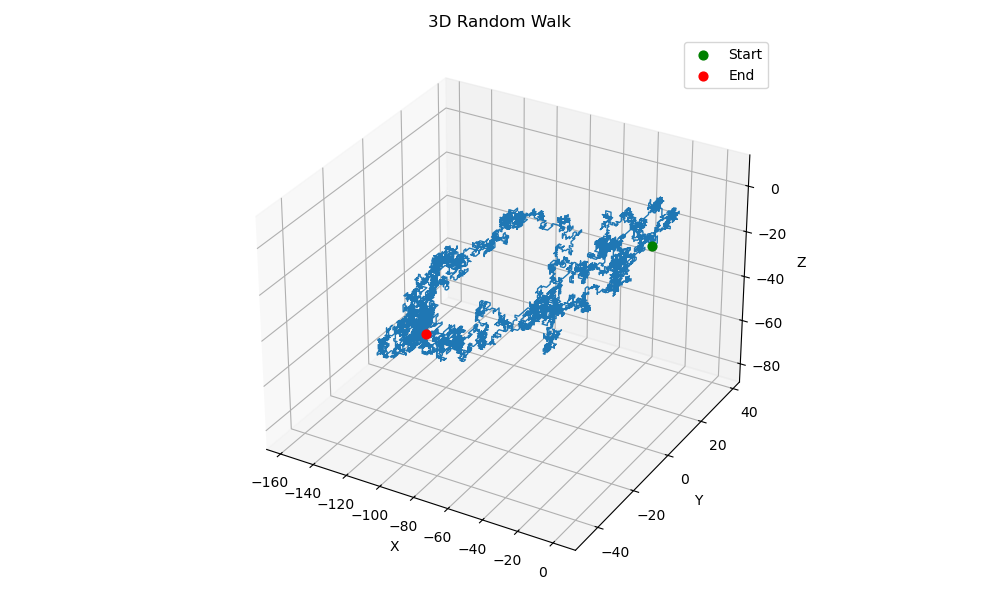

In [7]:
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')

ax.plot(x, y, z, linewidth=1)

ax.scatter(x[0], y[0], z[0], color="green", s=40, label="Start", zorder=10)
ax.scatter(x[-1], y[-1], z[-1], color="red",   s=40, label="End",   zorder=10)

ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("Z")
ax.set_title("3D Random Walk")

ax.legend()
plt.tight_layout()
plt.show()

# PART 2:  Brownian Motion as Limit of a Random Walk

Brownian motion can be obtained as the **scaling limit** of a simple symmetric random walk.  
Let  

$$
S_n = X_1 + X_2 + \dots + X_n,\qquad X_i \in \{-1,+1\},\ \mathbb{P}(X_i=1)=\mathbb{P}(X_i=-1)=\tfrac12.
$$

Define the rescaled process:

$$
W_n(t) = \frac{1}{\sqrt{n}}\, S_{\lfloor nt \rfloor},\qquad 0 \le t \le 1.
$$

As $n \to \infty$:

$$
W_n(t) \xRightarrow{d} B(t),
$$

where $B(t)$ is standard Brownian motion.

This convergence result is known as **Donsker’s invariance principle** or the **functional central limit theorem**.

In [8]:
def simulate_1d_bm(nsteps=1000, t=0.01):
    steps = [ np.random.randn()*np.sqrt(t) for i in range(nsteps) ]
    y = np.cumsum(steps)
    x = [ t*i for i in range(nsteps) ]
    return x, y

nsims = 6
simulation_data = pd.DataFrame()
for i in range(1, nsims):
    x, y = simulate_1d_bm()
    simulation_data['y{col}'.format(col=i)] = y
    simulation_data['x'] = x

for i in range(1, n_sims):
    print(f'Final value of simulation {i} is {simulation_data[f'y{i}'].iloc[-1]:.2f}.')

Final value of simulation 1 is 1.93.
Final value of simulation 2 is 7.08.
Final value of simulation 3 is 0.58.
Final value of simulation 4 is -1.87.
Final value of simulation 5 is -4.93.


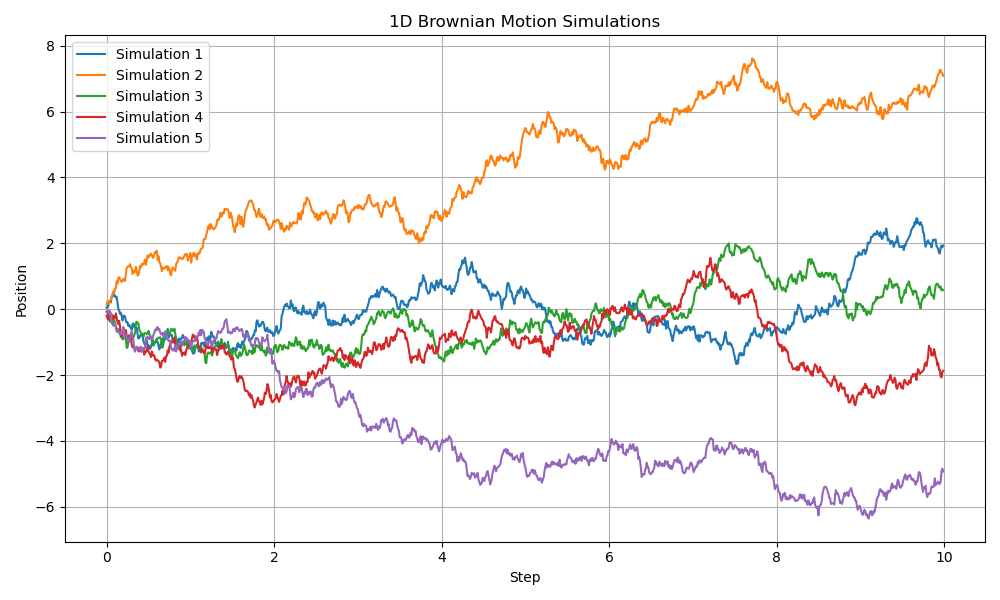

In [9]:
plt.figure(figsize  = (10,6))

for i in range(1, n_sims):
    plt.plot(simulation_data['x'], simulation_data[f'y{i}'], label = f'Simulation {i}')

plt.xlabel("Step")
plt.ylabel("Position") 
plt.title("1D Brownian Motion Simulations")
plt.grid(True)
plt.tight_layout()
plt.legend()
plt.show()

In [10]:
def simulate_2d_bm(nsteps=1000, t=0.01):
    x = np.cumsum([ np.random.randn()*np.sqrt(t) for i in range(nsteps) ])
    y = np.cumsum([ np.random.randn()*np.sqrt(t) for i in range(nsteps) ])
    return list(x), list(y)


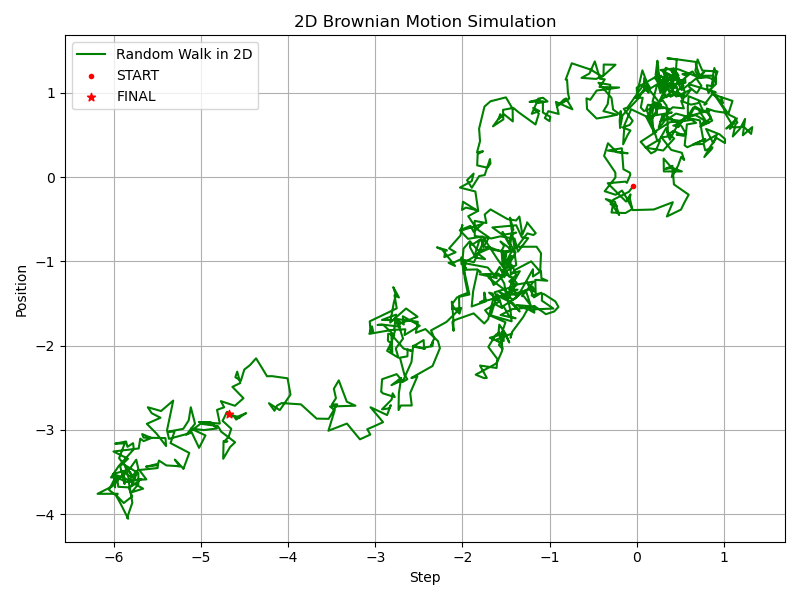

In [11]:
x, y = simulate_2d_bm()

plt.figure(figsize = (8,6), dpi = 100)
plt.plot(x, y, color = 'green', label = 'Random Walk in 2D')

plt.scatter(x[0], y[0], color = 'red', marker = '.', label = 'START', zorder = 10)
plt.scatter(x[-1], y[-1], color = 'red', marker = '*', label = 'FINAL', zorder = 10)

plt.xlabel("Step")
plt.ylabel("Position")
plt.title("2D Brownian Motion Simulation")
plt.grid(True)
plt.tight_layout()
plt.legend()
plt.show()

In [12]:
def simulate_3d_bm(nsteps=10000, t=0.01):
    x = np.cumsum([ np.random.randn()*np.sqrt(t) for i in range(nsteps) ])
    y = np.cumsum([ np.random.randn()*np.sqrt(t) for i in range(nsteps) ])
    z = np.cumsum([ np.random.randn()*np.sqrt(t) for i in range(nsteps) ])
    return list(x), list(y), list(z)

x, y, z = simulate_3d_bm()

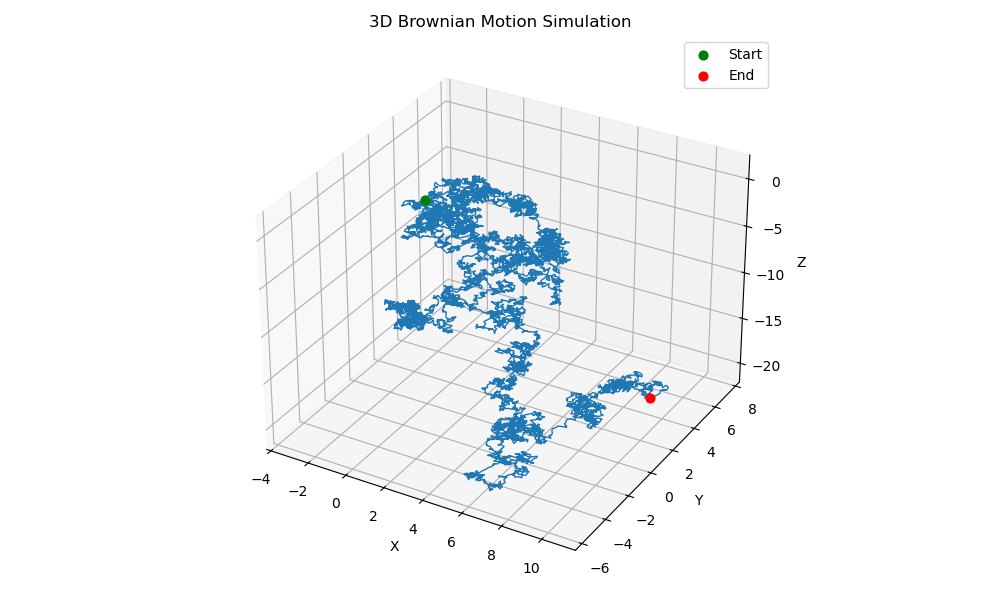

In [13]:
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')

ax.plot(x, y, z, linewidth=1)

ax.scatter(x[0], y[0], z[0], color="green", s=40, label="Start", zorder=10)
ax.scatter(x[-1], y[-1], z[-1], color="red",   s=40, label="End",   zorder=10)

ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("Z")
ax.set_title("3D Brownian Motion Simulation")

ax.legend()
plt.tight_layout()
plt.show()

### Brownian Motion with drift

Along with the usual random chain component  we add a drift component($\mu t$):
$$
U(t) = X(t) + \mu t
$$

In [14]:
def simulate_1d_bm_drift(nsteps=1000, t=0.01, mu = 0.5):
    steps = [ mu * 0.01 + np.random.randn()*np.sqrt(t) for i in range(nsteps) ]
    y = np.cumsum(steps)
    x = [ t*i for i in range(nsteps) ]
    return x, y

nsims = 6
simulation_data = pd.DataFrame()
for i in range(1, nsims):
    x, y = simulate_1d_bm_drift()
    simulation_data['y{col}'.format(col=i)] = y
    simulation_data['x'] = x

for i in range(1, n_sims):
    print(f'Final value of simulation {i} is {simulation_data[f'y{i}'].iloc[-1]:.2f}.')

Final value of simulation 1 is -1.34.
Final value of simulation 2 is 6.95.
Final value of simulation 3 is 10.83.
Final value of simulation 4 is 7.84.
Final value of simulation 5 is 7.44.


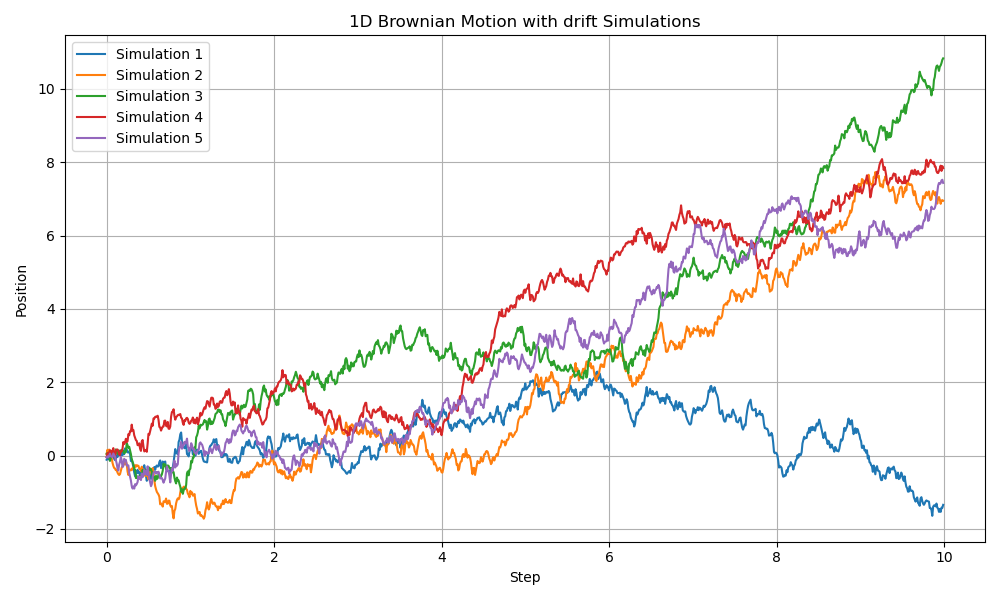

In [15]:
plt.figure(figsize  = (10,6))

for i in range(1, n_sims):
    plt.plot(simulation_data['x'], simulation_data[f'y{i}'], label = f'Simulation {i}')

plt.xlabel("Step")
plt.ylabel("Position") 
plt.title("1D Brownian Motion with drift Simulations")
plt.grid(True)
plt.tight_layout()
plt.legend()
plt.show()

# PART 3: Geometric Brownian Motion

It forms the bassi for the Black-Scholes equation where the log of returns of the stock prices is modelled.
It is defined as the **$\log [G(t)]$** where G(t) is defined as:
$$
G(t) = G(0)\exp [(\mu - \tfrac12\sigma^2)t + \sigma X(t)], (t\ge0)
$$

In [16]:
n_steps = 1000
time = 1
mu = 0.0001
sigma  = 0.02

def sim_1d_gbm(n_steps, t, mu, sigma):
    steps = [(mu - (sigma**2)/2) + np.random.randn()*sigma for _ in range(n_steps)]
    y = np.exp(np.cumsum(steps))
    x = [t*i for i in range(n_steps)]

    return x, y

n_sims = 6
simulation_data = pd.DataFrame()

for i in range(1, n_sims):
    x, y = sim_1d_gbm(n_steps, time, mu, sigma)

    simulation_data[f'y{i}'] = y
    simulation_data['x']  = x

print(simulation_data.head())

for i in range(1, n_sims):
    print(f'Final value of simulation {i} is {simulation_data[f'y{i}'].iloc[-1]:.2f}.')


         y1  x        y2        y3        y4        y5
0  0.990696  0  0.985551  1.012225  1.021115  1.010192
1  1.007945  1  0.961722  1.040697  1.005198  1.012955
2  1.002888  2  0.949457  1.047734  1.029500  1.016320
3  1.003272  3  0.961930  1.047199  1.028139  1.009351
4  1.001600  4  0.953520  1.062399  1.045791  1.008029
Final value of simulation 1 is 1.02.
Final value of simulation 2 is 1.11.
Final value of simulation 3 is 1.37.
Final value of simulation 4 is 1.57.
Final value of simulation 5 is 0.36.


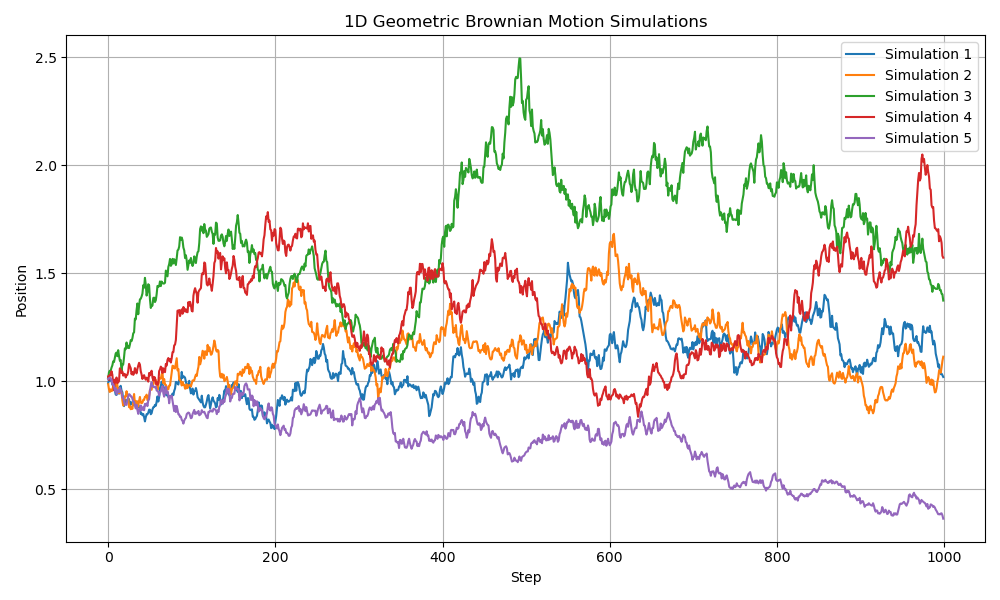

In [17]:
plt.figure(figsize  = (10,6))

for i in range(1, n_sims):
    plt.plot(simulation_data['x'], simulation_data[f'y{i}'], label = f'Simulation {i}')

plt.xlabel("Step")
plt.ylabel("Position") 
plt.title("1D Geometric Brownian Motion Simulations")
plt.grid(True)
plt.tight_layout()
plt.legend()
plt.show()

In [18]:
import yfinance as yf

start_time = '2024-01-01'
end_time =  '2025-01-01'

aapl = pd.DataFrame(yf.download("AAPL", start = start_time, end = end_time))
print(aapl.head())

/var/folders/f8/0hzmswyj0sn232kss0n40r_80000gn/T/ipykernel_17588/572900913.py:6: FutureWarning: YF.download() has changed argument auto_adjust default to True
  aapl = pd.DataFrame(yf.download("AAPL", start = start_time, end = end_time))
[*********************100%***********************]  1 of 1 completed

Price            Close        High         Low        Open    Volume
Ticker            AAPL        AAPL        AAPL        AAPL      AAPL
Date                                                                
2024-01-02  183.903229  186.677036  182.169601  185.399096  82488700
2024-01-03  182.526230  184.140985  181.713894  182.496512  58414500
2024-01-04  180.208099  181.377052  179.187737  180.445844  71983600
2024-01-05  179.484940  181.050159  178.484394  180.287374  62379700
2024-01-08  183.823990  183.863624  179.801976  180.386452  59144500


In [19]:
def sim_1d_gbm_stock(n_steps, t, mu, sigma, start=1):
    steps = [(mu - (sigma**2)/2) + np.random.randn()*sigma for _ in range(n_steps)]
    y = start*np.exp(np.cumsum(steps))
    x = [t*i for i in range(n_steps)]

    return x, y

In [20]:
prices = np.flip(aapl['Close'].values) # reverse to get the most recent price at time 0

time  = 1 #step

# convert to log prices
logprices = np.log(prices)
logreturns = logprices[1:] - logprices[:-1]
mu = np.mean(logreturns) #drift 
sigma = np.std(logreturns) #volatily
n_steps = logprices.shape[0]


x,y = sim_1d_gbm_stock(n_steps, time, mu, sigma, start = prices[0])

data = pd.DataFrame()
data['x'] = x
data['Simulation'] = y
data['AAPL'] = prices

### Observation
Here I am not ismulationg the historical path, only the future, but I am placing the historical and simulated data side by side for comparison.

A GBM simulation is used for future projections. From the historical data price series we only estimate teh drift $\mu$ and volatility $\sigma$, i.e. we only encode the **average trend** and **variability**.

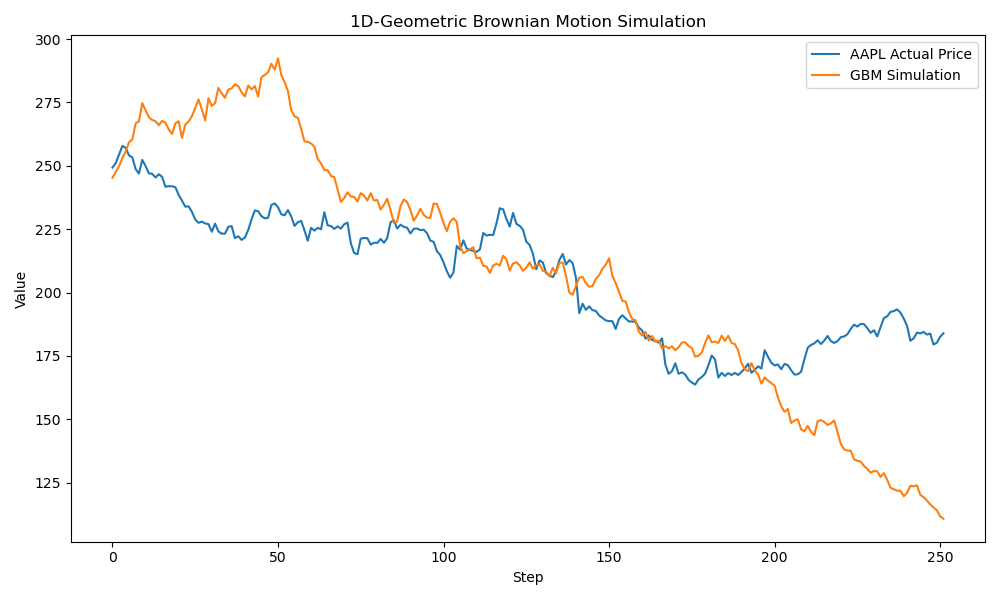

In [21]:
plt.figure(figsize  = (10,6))

plt.plot(data['x'], data['AAPL'], label='AAPL Actual Price')
plt.plot(data['x'], data['Simulation'], label='GBM Simulation')


plt.xlabel("Step")
plt.ylabel("Value") 
plt.title("1D-Geometric Brownian Motion Simulation")
plt.grid(False)
plt.tight_layout()
plt.legend()
plt.show()

# PART 4: Changes in the computation of the GBM
A stock price $S_t$ under GBM follows the SDE:
$$
dS_t = \mu S_tdt+ \sigma S_t dW_t
$$
where:
- $\mu$ = drift
- $\sigma$ = volatility
- $W_t$ = Wiener Process

Then the solutoon to this SDE is:
$$
S_t = S_0\exp ((\mu - \tfrac12\sigma^2)t + \sigma W_t)
$$

When simulating in discrete time, we split time into steps of length $\Delta t$:
$$
S_{t+\Delta t} = S_t\exp ((\mu - \tfrac12\sigma^2)\Delta t + \sigma \sqrt{\Delta t}Z_t)
$$

where:
- $Z_t \sim N(0,1)$

In [22]:
def sim_gbm_improved(n_steps, mu, sigma, start):
    dt = 1  # assuming daily steps
    shocks = np.random.randn(n_steps) * np.sqrt(dt)
    steps = (mu - 0.5 * sigma**2) * dt + sigma * shocks
    prices = start * np.exp(np.cumsum(steps))
    return prices

### Running Monte Carlo GBM
We genrate N gbm paths:
$$
\{S_t^{(1)}, S_t^{(2)}, \dots ,S_t^{(N)}\}
$$

Then we compute mean path, variance and percentiles.
$$
\mathbb{E}[S_t] \approx \frac{1}{N}\sum_{i=1}^N S_t^{(i)} \hspace{2cm} \text{Var}(S_t) \approx \frac{1}{N-1}\sum_{i=1}^N (S_t^{(i)} - \bar{S}_t)^2
$$

In [23]:
N = 1000   # number of Monte Carlo paths
paths = np.zeros((N, n_steps))

for i in range(N):
    paths[i, :] = sim_gbm_improved(n_steps, mu, sigma, start=prices[0])

In [24]:
mc_mean = paths.mean(axis=0)
mc_median = np.median(paths, axis=0)
lower_band = np.percentile(paths, 5, axis=0)
upper_band = np.percentile(paths, 95, axis=0)

final_prices = paths[:, -1]
VaR_5 = np.percentile(final_prices, 5)

In [25]:
print("prices:", prices.shape)
print("mc_mean:", mc_mean.shape)
print("mc_median:", mc_median.shape)
print("lower:", lower_band.shape)
print("upper:", upper_band.shape)

prices: (252, 1)
mc_mean: (252,)
mc_median: (252,)
lower: (252,)
upper: (252,)


In [26]:
prices = prices.ravel() # flattened the prices
df = pd.DataFrame({
    "AAPL": prices,
    "MC_mean": mc_mean,
    "MC_median": mc_median,
    "MC_low": lower_band,
    "MC_high": upper_band
})

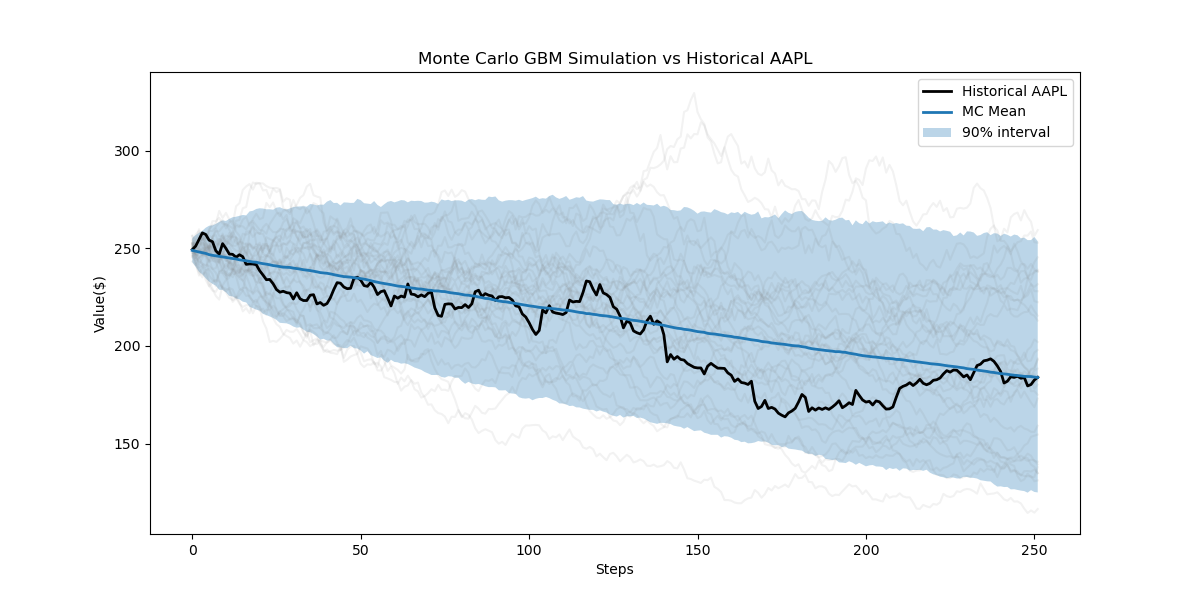

In [27]:
plt.figure(figsize=(12,6))

# some paths
plt.plot(paths[:30, :].T, alpha=0.1, color="gray")

# real data
plt.plot(prices, label="Historical AAPL", color="black", linewidth=2)

# MC Stats
plt.plot(mc_mean, label="MC Mean", linewidth=2)
plt.fill_between(range(n_steps), lower_band, upper_band, alpha=0.3, label="90% interval")

plt.legend()
plt.xlabel('Steps')
plt.ylabel('Value($)')
plt.title("Monte Carlo GBM Simulation vs Historical AAPL")
plt.show()

# Final: Model limitations
GBM enforces constant volatility, but real AAPL volatility is time-varying.

GBM cannot capture jumps.

GBM drift is constant, but real drift changes as market regimes shift.
